In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
trial_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_data_df, trial_data_df, how='outer', on='Mouse ID')


# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
avg_tumor_vol = mouse_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_vol_df = pd.DataFrame({"Tumor Volume (mm3)": avg_tumor_vol})
tumor_vol_df.reset_index(inplace=True)

# Preview DataFrame
tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_std_err = mouse_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_std_err_df = pd.DataFrame({"Tumor Volume (mm3)": tumor_std_err})
tumor_std_err_df.reset_index(inplace=True)

# Preview DataFrame
tumor_std_err_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vol_time = pd.pivot_table(tumor_vol_df, values='Tumor Volume (mm3)', index= ['Timepoint'], columns=['Drug'])

# Preview that Reformatting worked
tumor_vol_time.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


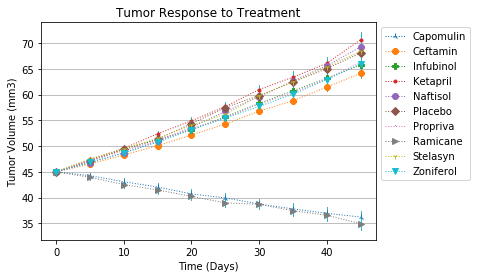

In [5]:
# Generate the Plot (with Error Bars)
valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if 
item[1] is not 'nothing' and not item[1].startswith('tick') 
and not item[1].startswith('caret') and not item[1].endswith('line')])

# use fillable markers

markers = np.random.choice(valid_markers, tumor_vol_time.shape[1], replace=False)


plot1 = tumor_vol_time.plot(kind='line', ls=':', lw=1)
for i, line in enumerate(plot1.get_lines()):
    line.set_marker(markers[i])
    plot1.errorbar(tumor_vol_df['Timepoint'],tumor_vol_df['Tumor Volume (mm3)'], yerr=tumor_std_err, lw=0, elinewidth=1, ecolor=line.get_color())
    
plot1.legend(plot1.get_lines(), tumor_vol_time.columns, bbox_to_anchor=(1, 1))
plot1.set_ylabel('Tumor Volume (mm3)')
plot1.set_xlabel('Time (Days)')
plot1.set_title('Tumor Response to Treatment')
plot1.yaxis.grid(True)


# Save the Figure
plt.autoscale(enable=True, axis='x')
plt.savefig("../Images/Tumor_Response.png", bbox_inches='tight')
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
tumor_avg_met = mouse_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
tumor_avg_met_df = pd.DataFrame({"Metastatic Sites": tumor_avg_met})
tumor_avg_met_df.reset_index(inplace=True)
# Preview DataFrame
tumor_avg_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
tumor_err_met = mouse_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
tumor_err_met_df = pd.DataFrame({"Metastatic Sites": tumor_err_met})
# Preview DataFrame
tumor_err_met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
tumor_met_time = pd.pivot_table(tumor_avg_met_df, values='Metastatic Sites', index= ['Timepoint'], columns=['Drug'])

# Preview that Reformatting worked
tumor_met_time.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


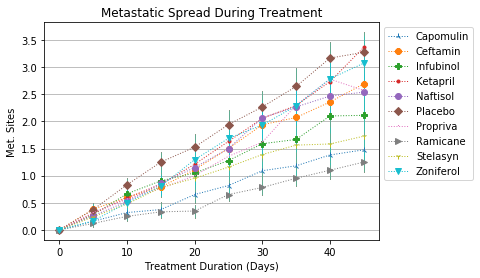

In [9]:
#markers2 = np.random.choice(valid_markers, tumor_met_time.shape[1], replace=False)

plot2 = tumor_met_time.plot(kind='line', ls=':', lw=1)
for i, line in enumerate(plot2.get_lines()):
    line.set_marker(markers[i])
    plot2.errorbar(tumor_avg_met_df['Timepoint'],tumor_avg_met_df['Metastatic Sites'], yerr=tumor_err_met, lw=0, elinewidth=.5)

    
plot2.legend(plot2.get_lines(), tumor_met_time.columns, bbox_to_anchor=(1, 1))
plot2.set_ylabel('Met. Sites')
plot2.set_xlabel('Treatment Duration (Days)')
plot2.set_title('Metastatic Spread During Treatment')
plot2.yaxis.grid(True)

#plot2.errorbar(0,2, yerr=tumor_std_err)


plt.autoscale(enable=True, axis='x')
plt.savefig("../Images/Tumor_Spread.png", bbox_inches='tight')
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = mouse_data.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
max_mice = mouse_data.groupby(["Drug", "Timepoint"])["Mouse ID"].count().max(level="Drug")
mice_percent = (mice_count/max_mice)*100

# Convert to DataFrame
mice_count_df = pd.DataFrame({"Mouse Count": mice_count, "Survial Rate": mice_percent})
mice_count_df.reset_index(inplace=True)

# Preview DataFrame
mice_count_df.head()


,Drug,Timepoint,Mouse Count,Survial Rate
0,Capomulin,0,25,100.0
1,Capomulin,5,25,100.0
2,Capomulin,10,25,100.0
3,Capomulin,15,24,96.0
4,Capomulin,20,23,92.0


In [11]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_time = pd.pivot_table(mice_count_df, values='Survial Rate', index= ['Timepoint'], columns=['Drug'])

# Preview that Reformatting worked
mice_count_time.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0


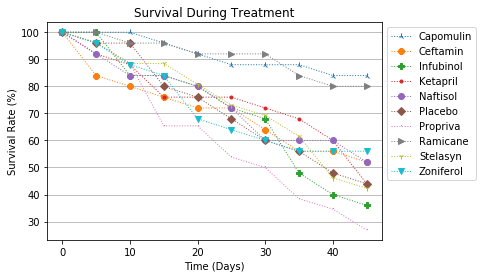

In [12]:
plot3 = mice_count_time.plot(kind='line', ls=':', lw=1)
for i, line in enumerate(plot3.get_lines()):
    line.set_marker(markers[i])
    
plot3.legend(plot3.get_lines(), mice_count_time.columns, bbox_to_anchor=(1, 1))
plot3.set_ylabel('Survival Rate (%)')
plot3.set_xlabel('Time (Days)')
plot3.set_title('Survival During Treatment')
plot3.yaxis.grid(True)


plt.autoscale(enable=True, axis='x')
plt.savefig("../Images/Mouse_Survival.png", bbox_inches='tight')
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
vol_p_start = tumor_vol_df.groupby("Drug")["Tumor Volume (mm3)"].first()
vol_p_end = tumor_vol_df.groupby("Drug")["Tumor Volume (mm3)"].last()
vol_p_change = (vol_p_end-vol_p_start)/vol_p_start*100

vol_p_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Tumor Volume (mm3), dtype: float64

In [14]:
vol_change = tuple(vol_p_change)
vol_change

(-19.475302667894173,
 42.51649185589744,
 46.12347172785187,
 57.028794686606076,
 53.92334713476923,
 51.29796048315153,
 47.24117486320637,
 -22.320900462766673,
 52.085134287899024,
 46.57975086509525)

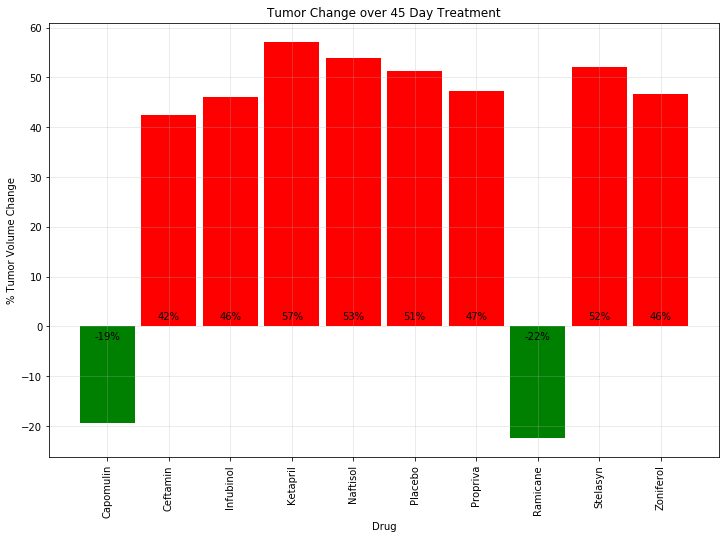

In [16]:
# Store all Relevant Percent Changes into a Tuple
vol_change = tuple(vol_p_change)
num_values = np.arange(len(vol_change))
# Splice the data between passing and failing drugs
passing = [x for x in vol_change if x >=0]
failing = [x for x in vol_change if x <0]

bar_color = []

for x in vol_change:
    if x>0:
        bar_color.append('r')
    else:
        bar_color.append('g')

# Orient widths. Add labels, tick marks, etc. 

plt.figure(figsize=(12,8))
ax = vol_p_change.plot(kind='bar', x=num_values, y=vol_change, color=bar_color, align="center", width=.9)
ax.set_title("Tumor Change over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
plt.grid(b=True, linewidth=.5, alpha=.5)


# Use functions to label the percentages of changes
def autolabel(ax):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    
    for rect in ax.patches:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0:
            label_position = y_bottom + abs(y_bottom) + 1
        else:
            label_position = y_bottom + abs(y_bottom) - 3

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height) + "%",
                ha='center', va='bottom')       

# Call functions to implement the function calls
autolabel(ax)

# Save the Figure
plt.autoscale(enable=True, axis='x')
plt.savefig("../Images/Tumor_Change.png", bbox_inches='tight')

# Show the Figure
plt.show()


Observations:
    
Out of the ten different options including the placebo there are only two drugs which actually reduced tumor spread and had higher rates of survival throughout the 45 day trial. These two were Capomulin and Ramicane. The rest of the treatments had very similar results to the placebo suggesting that they had little to no positive affect. Having that been said, all of the treatments at least made reduced the spread of tumors more than the placebo. Ketapril had the highest growth of tumors over the course of the study and Propriva had the lowest survival rate.